In [24]:
import pandas as pd
import numpy as np

# Крок 1: Зчитування даних про енергетику з файлу
DataFrameWithEnergy = pd.read_excel("En_In.xls", skiprows=2, usecols="C:F")
DataFrameWithEnergy.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Замінюємо "..." на NaN та перетворюємо значення на числовий тип
DataFrameWithEnergy['Energy Supply'] = DataFrameWithEnergy['Energy Supply'].replace("...", np.nan)
DataFrameWithEnergy['Energy Supply per Capita'] = DataFrameWithEnergy['Energy Supply per Capita'].replace("...", np.nan)
DataFrameWithEnergy['Energy Supply'] = pd.to_numeric(DataFrameWithEnergy['Energy Supply'], errors='coerce') * 1_000_000

# Крок 3: Перейменування окремих країн
country_renames = {
    "Republic of Korea": "South Korea",
    "United States of America": "United States",
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
DataFrameWithEnergy['Country'] = DataFrameWithEnergy['Country'].replace(country_renames)

# Крок 4: Видалення цифр та тексту в дужках із назв країн
DataFrameWithEnergy['Country'] = DataFrameWithEnergy['Country'].str.replace(r'\d+', '', regex=True)
DataFrameWithEnergy['Country'] = DataFrameWithEnergy['Country'].str.replace(r'\s*\(.*\)', '', regex=True).str.strip()

# Встановлюємо індекс за назвою країни
DataFrameWithEnergy = DataFrameWithEnergy.set_index('Country')[['Energy Supply', 'Energy Supply per Capita', '% Renewable']]

print("----------------------------------------")

# Перевіряємо наявність певних країн у даних
CheckRightInfo = DataFrameWithEnergy.loc[DataFrameWithEnergy.index.isin(['American Samoa', 'South Korea', 'Bolivia'])]
print(CheckRightInfo)
print("----------------------------------------")

# Зчитування даних про ВВП з файлу
GPDDataFrame = pd.read_csv("gpd.csv", skiprows=4)

# Перейменування окремих країн
country_renames = {
    "Korea, Rep.": "South Korea",
    "Iran, Islamic Rep.": "Iran",
    "Hong Kong SAR, China": "Hong Kong"
}

GPDDataFrame['Country Name'] = GPDDataFrame['Country Name'].replace(country_renames)
GPDDataFrame = GPDDataFrame.rename(columns={'Country Name': 'Country'}).set_index('Country').loc[:, '2006':'2015']

print(GPDDataFrame.head(1))
print("----------------------------------------")

# Зчитування даних із Scimagojr
ScimagojrDataFrame = pd.read_excel("scimagojr.xlsx")
ScimagojrDataFrame = ScimagojrDataFrame.loc[ScimagojrDataFrame['Rank'] <= 15]
ScimagojrDataFrame = ScimagojrDataFrame.set_index('Country')[['Rank', 'Documents', 'Citable documents', 'Citations',
                                                               'Self-citations', 'Citations per document', 'H index']]

# Об'єднання всіх DataFrame
combined_df = pd.merge(ScimagojrDataFrame, DataFrameWithEnergy, left_index=True, right_index=True, how='inner')
combined_df = pd.merge(combined_df, GPDDataFrame, left_index=True, right_index=True, how='inner')

print(combined_df.head(3))
print("----------------------------------------")

----------------------------------------
                Energy Supply Energy Supply per Capita % Renewable
Country                                                           
American Samoa            NaN                      NaN    0.641026
Bolivia          3.360000e+08                       32    31.47712
South Korea      1.100700e+10                      221    2.279353
----------------------------------------
         2006  2007  2008  2009          2010  2011  2012  2013  2014  2015
Country                                                                    
Aruba     NaN   NaN   NaN   NaN  2.467704e+09   NaN   NaN   NaN   NaN   NaN
----------------------------------------
                    Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
Japan                  3      30504              30287     223024   
Russian Federation     5      18534   

In [57]:
# Завдання 8: Розрахунок середнього ВВП за період 2006-2015 років
def calculateAverageGpd(OurDF):
    # Вибір колонок з даними ВВП за роки 2006-2015
    GDPcolumns = OurDF.loc[:, '2006':'2015']
    
    # Розрахунок середнього значення ВВП по рядках
    averageGDP = GDPcolumns.mean(axis=1)
    
    # Сортування середнього ВВП у спадному порядку
    averageGDPseries = averageGDP.sort_values(ascending=False)
    
    return averageGDPseries

print(calculateAverageGpd(combined_df))

Country
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
dtype: float64


In [59]:
# Завдання 9
def gdpChangeForFifthCountry(OurDF):
    # Розрахунок середнього ВВП за період 2006-2015
    averageGDP = OurDF.loc[:, '2006':'2015'].mean(axis=1)
    
    # Знаходимо назву п'ятої країни за величиною середнього ВВП
    fifthCountry = averageGDP.nlargest(5).index[-1]
    
    # Обчислюємо зміну ВВП між 2015 і 2006 роками для п'ятої країни
    GDPchange = OurDF.loc[fifthCountry, '2015'] - OurDF.loc[fifthCountry, '2006']
    return (fifthCountry, GDPchange)

print(gdpChangeForFifthCountry(combined_df))

('Brazil', 474343725980.5698)


In [61]:
# Завдання 10: Пошук країни з найбільшим відсотком відновлюваної енергії
def maxRenewableEnergyCountry(OurDF):
    # Визначення країни з максимальним відсотком відновлюваної енергії
    maxRenewableCountry = OurDF['% Renewable'].idxmax()
    
    # Отримання значення відсотка відновлюваної енергії для цієї країни
    maxRenewablePercentage = OurDF.loc[maxRenewableCountry, '% Renewable']
    
    return (maxRenewableCountry, maxRenewablePercentage)

print(maxRenewableEnergyCountry(combined_df))

('Brazil', 69.64803)


In [63]:
# Завдання 11: Оцінка населення та пошук шостої країни за цим показником
def estimatePopulation(OurDF):
    # Обчислення оцінки населення на основі енергопостачання та енергопостачання на душу населення
    OurDF['Population Estimate'] = OurDF['Energy Supply'] / OurDF['Energy Supply per Capita']
    
    # Перетворення значень оцінки населення на числовий тип (у разі можливих помилок у даних)
    OurDF['Population Estimate'] = pd.to_numeric(OurDF['Population Estimate'], errors='coerce')
    
    # Видалення рядків з відсутніми значеннями оцінки населення
    OurDF = OurDF.dropna(subset=['Population Estimate'])
    
    # Визначення шостої країни за величиною оцінки населення
    sixthCountry = OurDF.nlargest(6, 'Population Estimate').iloc[-1]
    
    return (sixthCountry.name, sixthCountry['Population Estimate'])

print(estimatePopulation(combined_df))

('Germany', 80369696.96969697)


In [65]:
# Завдання 12: Обчислення кореляції між цитуваннями на душу населення та енергопостачанням на душу населення
def calculateCitationPerCapitaCorrelation(OurDF):
    # Обчислення оцінки населення
    OurDF['Population Estimate'] = OurDF['Energy Supply'] / OurDF['Energy Supply per Capita']
    
    # Обчислення кількості цитувань на душу населення
    OurDF['Citations per Capita'] = OurDF['Citable documents'] / OurDF['Population Estimate']
    
    # Перетворення значень на числовий тип (у разі можливих помилок у даних)
    OurDF['Citations per Capita'] = pd.to_numeric(OurDF['Citations per Capita'], errors='coerce')
    
    # Видалення рядків з відсутніми значеннями в колонках 'Citations per Capita' та 'Energy Supply per Capita'
    OurDF = OurDF.dropna(subset=['Citations per Capita', 'Energy Supply per Capita'])
    
    # Обчислення кореляції між 'Citations per Capita' та 'Energy Supply per Capita'
    correlation = OurDF['Citations per Capita'].corr(OurDF['Energy Supply per Capita'])
    
    return correlation

print(calculateCitationPerCapitaCorrelation(combined_df))

0.8642899768854406


In [67]:
# Завдання 13: Створення індикатора відновлюваної енергії на основі медіани
def createRenewableIndicator(OurDF):
    # Обчислення медіани для стовпця '% Renewable'
    median_renewable = OurDF['% Renewable'].median()
    
    # Додавання нового стовпця 'Renewable Indicator'
    # Присвоюємо 1, якщо значення '% Renewable' більше або дорівнює медіанному, і 0 в іншому випадку
    OurDF['Renewable Indicator'] = (OurDF['% Renewable'] >= median_renewable).astype(int)
    
    # Повертаємо створений стовпець індикаторів
    return OurDF['Renewable Indicator']

print(createRenewableIndicator(combined_df))

Country
China                 1
Japan                 0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                0
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: Renewable Indicator, dtype: int32


In [69]:
# Завдання 14: Узагальнення інформації про населення за континентами
def summarizePopulationByContinent(OurDF):
    # Перевірка наявності стовпця 'Population Estimate', якщо його немає — обчислюємо
    if 'Population Estimate' not in OurDF.columns:
        OurDF['Population Estimate'] = OurDF['Energy Supply'] / OurDF['Energy Supply per Capita']

    # Створення словника, що зв'язує країни з континентами
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }

    # Додавання нового стовпця 'Continent', який визначає континент для кожної країни
    OurDF['Continent'] = OurDF.index.map(ContinentDict)
    
    # Групування даних за континентами та обчислення статистичних показників
    grouped_df = OurDF.groupby('Continent').agg(
        size=('Rank', 'size'),  # Кількість країн на кожному континенті
        sum=('Population Estimate', 'sum'),  # Загальна чисельність населення
        mean=('Population Estimate', 'mean'),  # Середня чисельність населення
        std=('Population Estimate', 'std')  # Стандартне відхилення чисельності населення
    )
    
    # Повернення групованого DataFrame
    return grouped_df

print(summarizePopulationByContinent(combined_df))

               size               sum              mean           std
Continent                                                            
Asia              5   2898666386.6106   579733277.32212  6.790979e+08
Australia         1   23316017.316017   23316017.316017           NaN
Europe            5  394058699.474436   78811739.894887  3.813228e+07
North America     1   35239864.864865   35239864.864865           NaN
South America     1  205915254.237288  205915254.237288           NaN


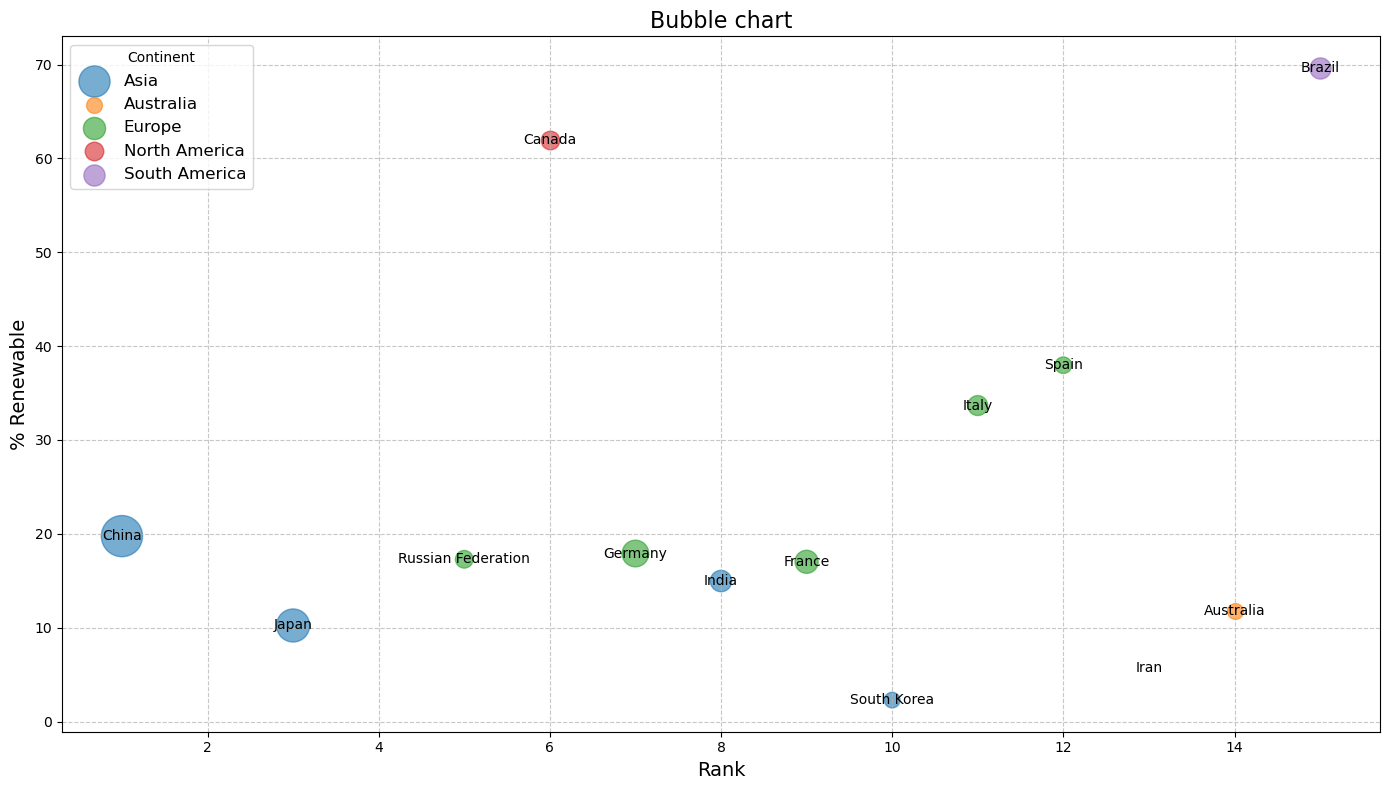

In [71]:
import matplotlib.pyplot as plt
import pandas as pd

# Завдання 15: Бульбашкова діаграма
def createBubbleChart(OurDF):
    # Додаємо колонку з оцінкою чисельності населення, якщо її немає
    if 'Population Estimate' not in OurDF.columns:
        OurDF['Population Estimate'] = OurDF['Energy Supply'] / OurDF['Energy Supply per Capita']

    # Словник континентів
    ContinentDict = {
        'China': 'Asia',
        'United States': 'North America',
        'Japan': 'Asia',
        'United Kingdom': 'Europe',
        'Russian Federation': 'Europe',
        'Canada': 'North America',
        'Germany': 'Europe',
        'India': 'Asia',
        'France': 'Europe',
        'South Korea': 'Asia',
        'Italy': 'Europe',
        'Spain': 'Europe',
        'Iran': 'Asia',
        'Australia': 'Australia',
        'Brazil': 'South America'
    }
    
    # Додаємо континенти до DataFrame
    OurDF['Continent'] = OurDF.index.to_series().map(ContinentDict)

    # Перетворюємо останній рік ВВП у числовий тип
    OurDF['2015'] = pd.to_numeric(OurDF['2015'], errors='coerce')
    
    # Створюємо бульбашкову діаграму
    plt.figure(figsize=(14, 8))
    
    # Відображаємо дані по континентах
    for continent, group in OurDF.groupby('Continent'):
        scatter = plt.scatter(
            group['Rank'],               # Рейтинг країни
            group['% Renewable'],        # Відсоток поновлюваних джерел
            s=group['2015'] / 1e10,      # Розмір бульбашки пропорційний ВВП
            alpha=0.6,                   # Прозорість бульбашок
            label=continent              # Мітка континенту
        )
    
    # Додаємо підписи країн
    for i, row in OurDF.iterrows():
        plt.text(
            row['Rank'], 
            row['% Renewable'], 
            i,                      # Назва країни
            fontsize=10, 
            ha='center', 
            va='center', 
            color='black'
        )
    
    # Налаштування графіка
    plt.title('Bubble chart', fontsize=16)
    plt.xlabel('Rank', fontsize=14)
    plt.ylabel('% Renewable', fontsize=14)
    plt.legend(title='Continent', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)

    # Показуємо графік
    plt.tight_layout()
    plt.show()

createBubbleChart(combined_df)